In [1]:
import env
import os
import wrangle as w
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Imputer
from sklearn.impute import SimpleImputer
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling: Scaling
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
# Modeling
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import GridSearchCV
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

### 1. Load your zillow dataset.

In [2]:
zillow = w.zillow()

No file exists, extracting from MySQL.


In [3]:
train, validate, test = w.splitter(zillow)

Dataframe: (2140235, 6) 100%
Train: (1369750, 6) | ~60%
Validate: (342438, 6) | ~20%
Test: (428047, 6) | ~20%


In [4]:
train.head()

,bedroomcnt,bathroomcnt,sq_feet,tax_value,yearbuilt,county
353297,4,2.0,1834,520117,1969,Orange
1185246,3,2.0,1694,378680,1949,LA
452922,4,3.0,2295,432768,1978,Ventura
163875,3,2.0,2182,393305,1969,LA
27042,4,2.0,2187,131101,1945,LA


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [30]:
x_train = train[['sq_feet']]
y_train = train['tax_value']
x_validate = validate[['sq_feet']]
y_validate = validate['tax_value']
x_test = test[['sq_feet']]
y_test = test['tax_value']


In [31]:
mms = MinMaxScaler()

In [38]:
x_train

,sq_feet
353297,1834
1185246,1694
452922,2295
163875,2182
27042,2187
...,...
1324400,2745
1379871,1782
1679286,1240
335945,1116


In [41]:
x_train['sq_feet'] = mms.fit_transform(x_train[['sq_feet']])

In [42]:
x_train

,sq_feet
353297,0.001924
1185246,0.001777
452922,0.002408
163875,0.002290
27042,0.002295
...,...
1324400,0.002881
1379871,0.001870
1679286,0.001301
335945,0.001171


In [45]:
model = lr().fit(x_train, y_train)
predictions = model.predict(x_train)

In [46]:
baseline = x_train.sq_feet.mean()
baseline
x_train['baseline'] = baseline

x_train['yhat'] = predictions

x_train.head()

,sq_feet,baseline,yhat
353297,0.001924,0.001955,453696.383060
1185246,0.001777,0.001955,418354.710808
452922,0.002408,0.001955,570071.460973
163875,0.002290,0.001955,541545.682656
27042,0.002295,0.001955,542807.885237


### 3. Plot the residuals for the linear regression model that you made.

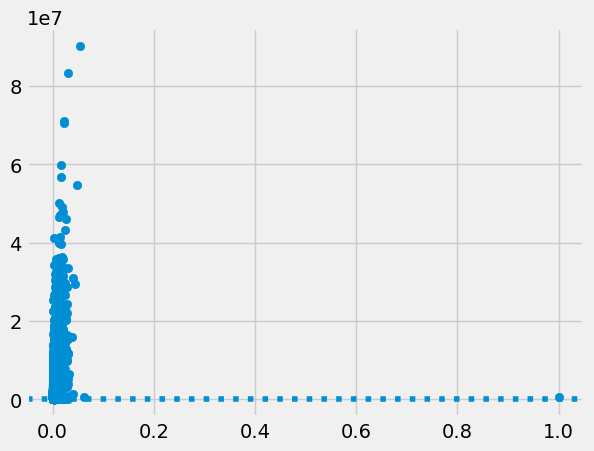

In [47]:
# visualizing x_train and y_train with baseline
plt.scatter(x_train.sq_feet, y_train)
plt.axhline([[baseline]], ls=':')
plt.show()

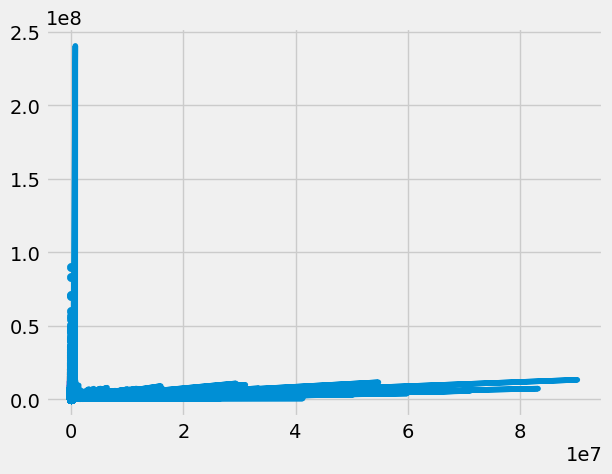

In [48]:
# visualizing residuals
plt.scatter(x_train.sq_feet,y_train)

plt.plot(y_train,x_train.yhat)

plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [49]:
# finding residuals
x_train['residuals'] = x_train['sq_feet'] - predictions
x_train['residuals_baseline'] = x_train['sq_feet'] - baseline

In [52]:
x_train['residuals_squared'] = x_train.residuals ** 2
x_train['residuals_baseline_squared'] = x_train.residuals_baseline ** 2
x_train.head()

,sq_feet,baseline,yhat,residuals,residuals_baseline,residuals_squared,residuals_baseline_squared
353297,0.001924,0.001955,453696.383060,-453696.381135,-0.000031,2.058404e+11,9.521014e-10
1185246,0.001777,0.001955,418354.710808,-418354.709031,-0.000178,1.750207e+11,3.162216e-08
452922,0.002408,0.001955,570071.460973,-570071.458565,0.000453,3.249815e+11,2.052953e-07
163875,0.002290,0.001955,541545.682656,-541545.680367,0.000334,2.932717e+11,1.118698e-07
27042,0.002295,0.001955,542807.885237,-542807.882942,0.000340,2.946404e+11,1.154086e-07


Adding residuals to find **sum of squared errors (SSE)**  

In [53]:
SSE = x_train.residuals_squared.sum()
SSE_baseline = x_train.residuals_baseline_squared.sum()

In [54]:
print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 431458463630747712.0
SSE Baseline = 2.4


**Mean Squared Errors (MSE)**

In [55]:
MSE = SSE /len(x_train)
MSE_baseline = SSE_baseline/len(x_train)

In [56]:
print(f'MSE = {MSE:.1f}')
print(f"MSE baseline = {MSE_baseline:.1f}")

MSE = 314990665180.3
MSE baseline = 0.0


**Root Mean Squared Error (RMSE)**

In [57]:
RMSE = MSE ** .5
RMSE_baseline = MSE_baseline ** .5

In [58]:
print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  561240.3
RMSE baseline =  0.0


*Using SKLearn*

In [59]:
r2_score(y_train, x_train['yhat'])

0.21885362653938845

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [68]:
def compare_SSE(SSE, SSE_baseline):
    '''
    compares model and baseline metrics to return whether a model is better or not
    '''

    if SSE < SSE_baseline:
        print(f'The model is performing better than baseline with an SSE of:{SSE} \nSSE for baseline is:{SSE}')
    else:
        print(f'The model is not performing better than baseline with an SSE of:{SSE_baseline} \nSSE for model is:{SSE}')
    return

compare_SSE(SSE, SSE_baseline)

The model is not performing better than baseline with an SSE of:2.4247409518714056 
SSE for model is:4.314584636307477e+17


### 7. What is the amount of variance explained in your model?

In [67]:
# variance explained is also Mean_squared_error
print(explained_variance_score(y_train,x_train.yhat).round(2))
print(r2_score(y_train,x_train.yhat).round(2))

0.22
0.22


### 8. Is your model better than the baseline model?

In [62]:
#### No, likely due to outliers.

### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- -  sum of squared errors (SSE)
- - explained sum of squares (ESS)
- - total sum of squares (TSS)
- - mean squared error (MSE)
- - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [137]:
def regression_errors(x_train, y_train, yhat, baseline='mean'):
    '''
    '''
    if baseline == 'mean':
        baseline = x_train.mean()
    else:
        baseline = x_train.median()
    
    residuals = x_train - yhat
    residuals_baseline = x_train - baseline

    
    SSE =  (residuals ** 2).sum()
    SSE_baseline = (residuals_baseline ** 2).sum()

    print('~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~')
    print('| SSE =', "{:.1f}".format(SSE),"             |")
    print("| SSE Baseline =", "{:.1f}".format(SSE_baseline),"                     |")
    print('~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~')

    MSE = SSE /len(x_train)
    MSE_baseline = SSE_baseline/len(x_train)

    print(f'| MSE = {MSE:.1f}','                   |')
    print(f"| MSE baseline = {MSE_baseline:.1f}","                     |")
    print('~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~')

    ESS = (([yhat] - y_train.mean())**2).sum()
    ESS_baseline = (([baseline] - y_train.mean())**2).sum()
    print(f"| ESS = ", "{:.1f}".format(ESS),'            |')
    print(f"| ESS baseline = ", "{:.1f}".format(ESS_baseline),'         |')
    print('~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~')

    RMSE = MSE ** .5
    RMSE_baseline = MSE_baseline ** .5
    print(f"| RMSE = ", "{:.1f}".format(RMSE),'                       |')
    print(f"| RMSE baseline = ", "{:.1f}".format(RMSE_baseline),'                   |')
    print('~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~')

    return SSE, SSE_baseline, MSE, MSE_baseline, ESS, ESS_baseline, RMSE, RMSE_baseline

In [138]:
SSE, SSE_baseline, MSE, MSE_baseline, ESS, ESS_baseline, RMSE, RMSE_baseline = regression_errors(x_train=x_train['sq_feet'],yhat=x_train['yhat'],y_train=y_train)

~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~
| SSE = 431458463630747712.0              |
| SSE Baseline = 2.4                      |
~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~
| MSE = 314990665180.3                    |
| MSE baseline = 0.0                      |
~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~
| ESS =  140210915479904592.0             |
| ESS baseline =  212628252832.3          |
~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~
| RMSE =  561240.3                        |
| RMSE baseline =  0.0                    |
~~ ~~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~~ ~~ ~~
